In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('coin-detection.jpg')

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [5]:
#cv2.imshow('image', thresh) 

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv ,7)

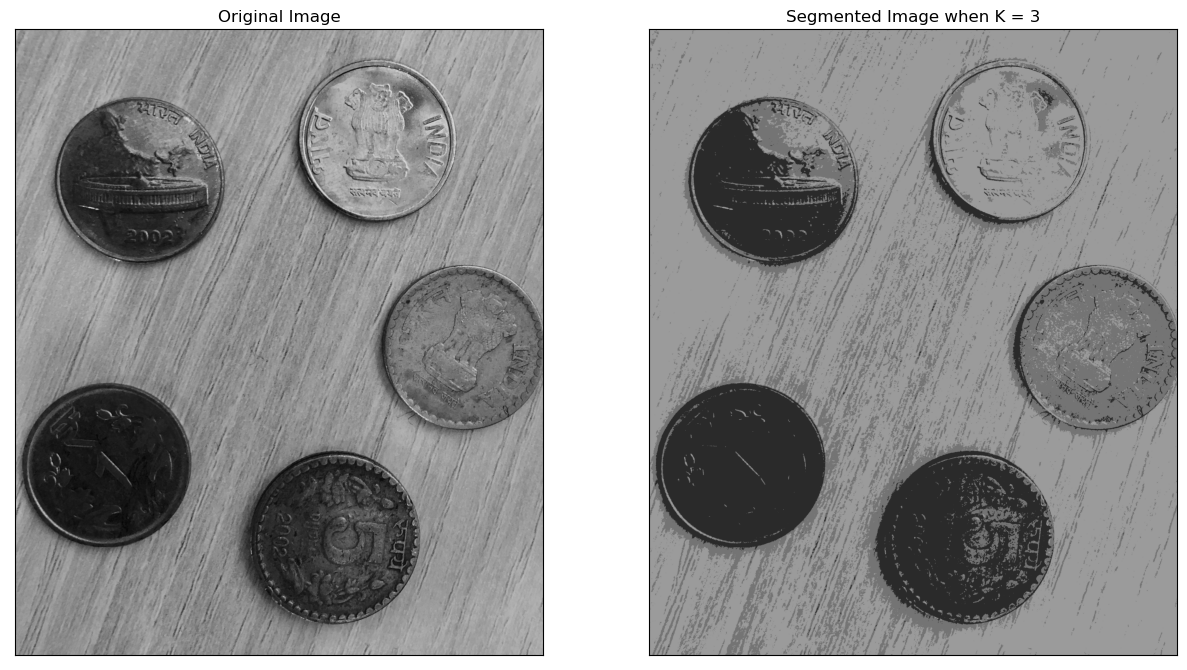

In [8]:
#!/usr/bin/env python3.7.5
# -*- Coding: UTF-8 -*-

# Read allsky image file and do segmentation
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image file and convert from color to RGB
original_image = cv2.imread('coin-detection.jpg')
img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB, 0)
# converts the MxNx3 image into a Kx3 matrix where K=MxN
vectorized = img.reshape((-1,3))
# convert the unit8 values to float
vectorized = np.float32(vectorized)
# color clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts = 10
ret,label,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
# Regenerate image
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

# Remove black (borders)
#lower = np.array([50,50,1])  #-- Lower range --
#upper = np.array([255,255,255])  #-- Upper range --
#mask = cv2.inRange(img, lower, upper)
#res = cv2.bitwise_and(img, img, mask= mask)  #-- Contains pixels having the gray color--
#result_image = res.reshape((img.shape))

# Plot images
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# Canny Edge detection
#edges = cv2.Canny(img,150,200)
#plt.figure(figsize=(figure_size,figure_size))
#plt.subplot(1,2,1),plt.imshow(img)
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#plt.show()